In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
features, labels

(tensor([[-0.5222, -2.0213],
         [ 1.2005,  0.4305],
         [ 0.9331, -0.9284],
         ...,
         [ 0.5826, -1.0020],
         [ 0.4950, -0.6491],
         [-1.1676, -0.2200]]),
 tensor([[ 1.0042e+01],
         [ 5.1370e+00],
         [ 9.2358e+00],
         [ 2.6141e+00],
         [ 4.0951e+00],
         [ 7.1792e+00],
         [ 7.2793e+00],
         [ 3.2021e+00],
         [-3.2837e+00],
         [ 6.2780e+00],
         [ 1.2740e+01],
         [ 4.4402e+00],
         [ 3.1149e+00],
         [ 4.9847e+00],
         [-4.9887e+00],
         [-5.7013e+00],
         [ 7.2215e+00],
         [ 5.8205e+00],
         [ 5.8708e+00],
         [ 1.7154e+00],
         [ 1.0720e+01],
         [ 7.5204e+00],
         [ 6.4611e-01],
         [ 7.1055e+00],
         [-5.8954e-01],
         [ 1.2954e+01],
         [ 1.0066e+01],
         [ 6.9496e+00],
         [ 4.9414e+00],
         [-3.8542e-01],
         [ 1.3355e+01],
         [ 4.8206e+00],
         [ 6.6451e+00],
         [ 4.2346e

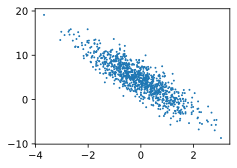

In [6]:
# features 的第二列 和labels的线性关系
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

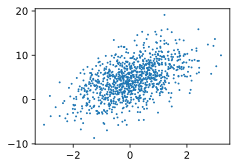

In [7]:
# features 的第一列 和labels的线性关系
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1);

In [8]:
# 该函数接收批量大小、特征矩阵和标签向量作为输入，
# 生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    print(indices)
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) 
    for i in range(0, num_examples, batch_size):
        # 每一个随机抽取出来的小样本的索引
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[-0.4416, -0.2792],
        [-0.7383,  1.0457],
        [-1.7086, -0.4233],
        [-0.2244,  1.6446],
        [-0.2991,  0.3746],
        [-0.0542,  0.2551],
        [-0.3306, -1.3421],
        [-0.0718, -0.2465],
        [-1.1226, -0.6368],
        [ 0.0974,  0.4115]]) 
 tensor([[ 4.2579],
        [-0.8371],
        [ 2.2294],
        [-1.8304],
        [ 2.3403],
        [ 3.2251],
        [ 8.0939],
        [ 4.8992],
        [ 4.1203],
        [ 2.9905]])


## 初始化模型参数

In [27]:
w = torch.normal(0, 0.01, size=(2, 1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [28]:
def linreg(X, w, b):  #@save
    return torch.matmul(X, w) + b

In [29]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [31]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [32]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。
        # l中的所有元素被加到一起，并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.022591
epoch 2, loss 0.000082
epoch 3, loss 0.000050


In [33]:
w, b

(tensor([[ 2.0000],
         [-3.4004]], requires_grad=True),
 tensor([4.1990], requires_grad=True))

In [34]:
true_w, true_b

(tensor([ 2.0000, -3.4000]), 4.2)

In [35]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-1.4067e-05,  3.9935e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0010], grad_fn=<RsubBackward1>)


In [42]:
w = torch.zeros(size=(2, 1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [43]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.022492
epoch 2, loss 0.000082
epoch 3, loss 0.000050
